In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 14 and 15

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Instructions
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Group wotk instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


### General submission instructions

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
- **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.
  
- **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.
     
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.
     
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
- **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.
     
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
- **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 
   
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/ram-
[nltk_data]     mashruwala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ram-
[nltk_data]     mashruwala/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
import string
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "Artificial Intelligence",
    "Deep learning",
    "Unsupervised learning",
    "Quantum Computing",
    "Environmental protection",
    "Climate Change",
    "Renewable Energy",
    "Biodiversity",
    "French Cuisine",
    "Bread food",
    "Dumpling food",
]
wiki_dict = {"wiki query": [], "text": [], "n_words": []}
remove_tokens = list(string.punctuation) + ['``', '’', '`', 'br', '"', "”", "''", "'s", "(", ")", "[", "]"]

# Running this code might take some time.
for query in queries:
    try:
        # Attempt to fetch the page content
        page_content = wikipedia.page(query).content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for query: {query}. Skipping...")
        continue
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Query: {query} led to a disambiguation page. Choosing the first option: {e.options[0]}")
        page_content = wikipedia.page(e.options[0]).content

    text = sent_tokenize(page_content)[0]
    tokenized = word_tokenize(text)
    text_pp = [token.lower() for token in tokenized if token.lower() not in remove_tokens]
    wiki_dict["n_words"].append(len(text_pp))
    wiki_dict["text"].append(" ".join(text_pp))
    wiki_dict["wiki query"].append(query)

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20
7,Biodiversity,biodiversity is the variability of life on earth,8
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10
9,Bread food,bread is a baked food product made from water flour and often yeast,13


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

- If tasked with manually clustering documents from this toy corpus, how many clusters would you identify, and what labels would you assign to each cluster?
</div>

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

I notice that there are 3 clusters of data. One for Computer Science related topics (artificial intelligence, deep learning, unsupervised learning and quantum computing), one related to the environment (environmental protection, climate change, renewable energy and biodiversity) and the last one is related to food (french cuisine, bread food and dumpling).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 K-Means with bag-of-words representation 
rubric={accuracy}

In the lecture, we explored how **data representation significantly impacts clustering quality**. We saw that replacing a **flattened image representation** with feature vectors extracted from **pre-trained models** greatly improved clustering results.  

What about text data? In previous machine learning courses, we have used the **bag-of-words (BoW) representation** to numerically encode text, where each document is represented with a vector of word frequencies. 

In this exercise, you will **cluster documents** using this **simplistic text representation**.  

<div class="alert alert-info">

**Your tasks:**

1. Use [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with its **default settings** to transform the `text` column in `wiki_df` into a numerical representation.  

2. Use [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster the encoded documents and store the cluster labels in `kmeans_bow_labels`.  
   - Set `random_state=42` for **reproducibility**.
     
   - Use the **number of clusters** (`n_clusters`) identified in the **previous exercise**.  
</div>

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [5]:
from sklearn.feature_extraction.text import CountVectorizer


count_vec = CountVectorizer()
transformed_text = count_vec.fit_transform(wiki_df["text"])

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=123)
kmeans.fit(transformed_text)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [7]:
kmeans_bow_labels = kmeans.predict(transformed_text)

In [8]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,0
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,0
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,1
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,0
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,0
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,0
7,Biodiversity,biodiversity is the variability of life on earth,8,0
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,0
9,Bread food,bread is a baked food product made from water flour and often yeast,13,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 K-Means with sentence embedding representation
rubric={accuracy}

In the previous exercise, you may have noticed that clustering results were suboptimal. While the bag-of-words (BoW) representation is useful, it has significant limitations. It does not capture word order or context effectively.  

To improve text representation, we can use pre-trained models, similar to those used for image data, to extract richer, context-aware embeddings through transfer learning. In this lab, we will use the **pre-trained model** `'all-MiniLM-L6-v2'`, available via the [Sentence Transformers](https://www.sbert.net/index.html) package.  

This deep learning model generates **dense, fixed-length vector representations** of sentences, capturing **semantic meaning and contextual information**. These representations are particularly effective for **clustering and semantic similarity tasks**. If you're interested in exploring more **pre-trained models**, refer to the [full list here](https://www.sbert.net/docs/pretrained_models.html). We will explore these representations further in **DSCI 575**.  

<div class="alert alert-info">

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus.
   
3. Apply `KMeans` to the **sentence embeddings** (`emb_sents`) and store the cluster labels in `kmeans_emb_labels`. Use the following parameters:  
    - `random_state=42` (for reproducibility)
      
    - `n_clusters`=the number of clusters you identified in 1.1

Note
- The code below might throw a warning. You may ignore it for the purpose of this lab. 
</div>

In [9]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

In [10]:
emb_sents = embedder.encode(wiki_df["text"].tolist())
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.005857,-0.004795,-0.000976,0.011121,0.005294,-0.061630,0.062072,0.033673,-0.035251,0.074072,...,0.088312,-0.006600,0.036511,-0.020797,-0.002082,0.058263,0.061880,0.097383,0.058155,-0.052016
1,-0.124845,-0.084891,0.082492,0.017458,0.022980,0.056852,-0.060654,-0.060344,-0.020284,-0.070915,...,0.082265,0.009324,-0.005930,-0.130974,0.002398,0.052424,-0.008989,0.015588,-0.017661,-0.018494
2,-0.056721,-0.049697,-0.014780,0.022572,0.051773,0.007456,0.008632,-0.074847,-0.065573,-0.027284,...,0.014761,-0.022392,0.021360,-0.107016,0.020530,0.045678,0.052755,0.005429,0.022018,-0.010994
3,-0.072006,0.006120,-0.085242,0.051515,-0.119036,0.015745,-0.006809,-0.064673,0.004276,0.018435,...,-0.067665,0.031661,-0.017610,-0.072480,-0.008318,0.127195,0.033353,0.084555,0.015100,0.020704
4,-0.012700,0.101830,0.066676,-0.007987,0.140040,0.041627,0.035495,-0.050723,-0.037633,0.055886,...,-0.042105,-0.038883,0.018268,0.009920,0.028208,0.052759,-0.009605,-0.004518,0.060853,0.057709
5,-0.014444,0.022869,0.145982,0.054865,0.085204,-0.014689,-0.102757,0.016853,-0.023799,0.021148,...,0.011778,0.016817,-0.020041,0.006375,0.055428,0.076868,-0.047152,-0.114797,-0.056382,0.022349
6,-0.044869,0.076882,-0.012749,0.033335,0.067894,-0.002326,0.031620,-0.021576,0.046619,0.005089,...,-0.021575,-0.017596,-0.069995,0.004461,-0.040409,-0.043067,0.044042,-0.050977,0.056506,0.048708
7,0.027806,0.077117,0.015403,-0.013544,0.043216,0.048124,0.027763,-0.022999,0.049303,0.009686,...,0.014946,-0.020896,0.022283,-0.012311,0.014079,0.028085,0.025272,-0.015233,-0.014879,-0.064280
8,0.026616,-0.019929,-0.008049,-0.025907,-0.055372,0.011235,-0.024538,-0.065724,0.058374,-0.062895,...,-0.059513,0.077446,-0.059827,-0.021454,0.088102,-0.127180,-0.031399,0.120572,0.072373,-0.058336
9,-0.014786,0.055887,-0.020880,0.005313,-0.025037,0.040478,0.035260,0.024938,0.017546,0.072433,...,-0.082098,0.037856,-0.020007,-0.087252,0.058164,-0.044187,-0.030253,-0.080385,0.075614,-0.070403


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 2

In [11]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=123)
kmeans.fit(emb_sents)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [12]:
kmeans_emb_labels = kmeans.predict(emb_sents)

In [13]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,0,1
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,0,1
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,1,1
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,0,1
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0,0
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,0,0
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,0,0
7,Biodiversity,biodiversity is the variability of life on earth,8,0,0
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,0,2
9,Bread food,bread is a baked food product made from water flour and often yeast,13,0,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with sentence embedding representation and cosine distance  
rubric={accuracy}

Now, let's apply [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to our toy dataset.  

Unlike K-Means, which relies on Euclidean distance due to its use of centroids, DBSCAN allows us to experiment with different distance metrics. For text data, [**cosine similarity**](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) (or its complement, **cosine distance**) is often more effective than Euclidean distance.  

The **cosine distance** between two vectors $u$ and $v$ is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$

<div class="alert alert-info">

**Your tasks:**

- Apply **DBSCAN** to cluster documents encoded with **sentence embeddings** (`emb_sents`) and store the cluster labels in `dbscan_emb_labels`.
    
- Set `metric='cosine'` to use **cosine distance** for clustering.
- Tune the **hyperparameters** `eps` and `min_samples` to obtain meaningful clusters, as the default values are unlikely to work well on this dataset.  

**Notes for tuning the hyperparameters:**

- Start by examining the minimum, maximum, and mean cosine distances in the dataset. You can compute pairwise cosine distances using the package imported below.
  
- Experiment with a range of `eps` values and print the number of clusters and their sizes for each value.
- Select the `eps` value that produces the desired number of clusters.


</div>

In [14]:
from sklearn.metrics.pairwise import cosine_distances

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [15]:
from sklearn.cluster import DBSCAN

# Without hyperparameter optimization
dbscan = DBSCAN(metric="cosine")
dbscan_emb_labels = dbscan.fit_predict(emb_sents)
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,0,1,-1
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,0,1,-1
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,1,1,-1
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,0,1,-1
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0,0,-1
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,0,0,-1
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,0,0,-1
7,Biodiversity,biodiversity is the variability of life on earth,8,0,0,-1
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,0,2,-1
9,Bread food,bread is a baked food product made from water flour and often yeast,13,0,2,-1


In [16]:
temp = cosine_distances(emb_sents)
pd.DataFrame(temp)

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.588332,0.599214,0.669751,0.881103,0.929542,0.872963,0.966993,0.955306,0.999688,0.971202
1,0.588332,0.000000,0.502856,0.839877,0.983210,0.931067,0.939051,0.996501,0.930062,0.980953,0.985515
2,0.599214,0.502856,0.000000,0.859689,0.992789,0.895165,0.901938,0.916208,0.925734,0.896099,0.985251
3,0.669751,0.839877,0.859689,0.000000,0.942836,0.979528,0.916772,0.962861,1.034551,0.937436,0.994995
4,0.881103,0.983210,0.992789,0.942836,0.000000,0.745969,0.636967,0.616707,1.007249,1.019313,1.031481
5,0.929542,0.931067,0.895165,0.979528,0.745969,0.000000,0.728894,0.771501,0.996561,1.028922,1.025697
6,0.872963,0.939051,0.901938,0.916772,0.636967,0.728894,0.000000,0.793471,0.924078,0.934617,0.955627
7,0.966993,0.996501,0.916208,0.962861,0.616707,0.771501,0.793471,0.000000,0.959454,0.954988,0.878181
8,0.955306,0.930062,0.925734,1.034551,1.007249,0.996561,0.924078,0.959454,0.000000,0.722382,0.725536
9,0.999688,0.980953,0.896099,0.937436,1.019313,1.028922,0.934617,0.954988,0.722382,0.000000,0.919849


Looking at this table, we can see that the min_distance is 0.588332, which will be rounded up to 0.6, and the max distance is 1.034551, which will be rounded up to 1.1

In [17]:
eps_values = [0.6 + 0.1 * i for i in range(5)]

for min_sample in range(1, 10):
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample, metric="cosine")
        print(f"min_sample: {min_sample}, eps: {eps}, result: {dbscan.fit_predict(emb_sents)}")

min_sample: 1, eps: 0.6, result: [0 0 0 1 2 3 4 5 6 7 8]
min_sample: 1, eps: 0.7, result: [0 0 0 0 1 2 1 1 3 4 5]
min_sample: 1, eps: 0.8, result: [0 0 0 0 1 1 1 1 2 2 2]
min_sample: 1, eps: 0.9, result: [0 0 0 0 0 0 0 0 0 0 0]
min_sample: 1, eps: 1.0, result: [0 0 0 0 0 0 0 0 0 0 0]
min_sample: 2, eps: 0.6, result: [ 0  0  0 -1 -1 -1 -1 -1 -1 -1 -1]
min_sample: 2, eps: 0.7, result: [ 0  0  0  0  1 -1  1  1 -1 -1 -1]
min_sample: 2, eps: 0.8, result: [0 0 0 0 1 1 1 1 2 2 2]
min_sample: 2, eps: 0.9, result: [0 0 0 0 0 0 0 0 0 0 0]
min_sample: 2, eps: 1.0, result: [0 0 0 0 0 0 0 0 0 0 0]
min_sample: 3, eps: 0.6, result: [ 0  0  0 -1 -1 -1 -1 -1 -1 -1 -1]
min_sample: 3, eps: 0.7, result: [ 0  0  0  0  1 -1  1  1 -1 -1 -1]
min_sample: 3, eps: 0.8, result: [0 0 0 0 1 1 1 1 2 2 2]
min_sample: 3, eps: 0.9, result: [0 0 0 0 0 0 0 0 0 0 0]
min_sample: 3, eps: 1.0, result: [0 0 0 0 0 0 0 0 0 0 0]
min_sample: 4, eps: 0.6, result: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_sample: 4, eps: 0.7, result: 

Looking at this result, we can see that best hyperparameter is when min_sample = 1 and when eps = 0.8

In [18]:
dbscan = DBSCAN(eps=0.8, min_samples=1, metric="cosine")

In [19]:
dbscan_emb_labels = dbscan.fit_predict(emb_sents)

In [20]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,0,1,0
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,0,1,0
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,1,1,0
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,0,1,0
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0,0,1
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,0,0,1
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,0,0,1
7,Biodiversity,biodiversity is the variability of life on earth,8,0,0,1
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,0,2,2
9,Bread food,bread is a baked food product made from water flour and often yeast,13,0,2,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={accuracy}

<div class="alert alert-info">

**Your tasks:**

Apply hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.

3. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

</div>

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [50.0, 50.0, 83.75, 83.75],
  [12.5, 12.5, 66.875, 66.875]],
 'dcoord': [[0.0,
   np.float64(0.7223821579880305),
   np.float64(0.7223821579880305),
   0.0],
  [0.0,
   np.float64(0.9198489971759485),
   np.float64(0.9198489971759485),
   np.float64(0.7223821579880305)],
  [0.0, np.float64(0.6167074891701493), np.float64(0.6167074891701493), 0.0],
  [0.0, np.float64(0.7288938553144938), np.float64(0.7288938553144938), 0.0],
  [np.float64(0.6167074891701493),
   np.float64(0.7934705960147468),
   np.float64(0.7934705960147468),
   np.float64(0.7288938553144938)],
  [0.0, np.float64(0.5028565822568605), np.float64(0.5028565822568605), 0.0],
  [0.0,
   np.float64(0.5992136805949191),
   np.float64(0.5992136805949191),
   np.float64(0.5028565822568605)],
 

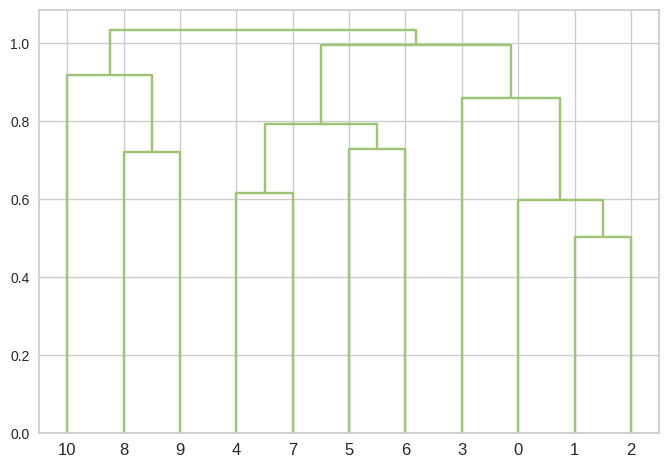

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_array = linkage(emb_sents, method="complete", metric="cosine")
ax = plt.gca()
dendrogram(linkage_array, ax=ax, color_threshold=2)

In [42]:
hier_emb_labels = fcluster(linkage_array, 3, criterion="maxclust")

In [43]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,0,1,0,3
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,0,1,0,3
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,1,1,0,3
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,0,1,0,3
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,0,0,1,2
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,0,0,1,2
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,0,0,1,2
7,Biodiversity,biodiversity is the variability of life on earth,8,0,0,1,2
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,0,2,2,1
9,Bread food,bread is a baked food product made from water flour and often yeast,13,0,2,2,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
- effect of input representation on clustering results

- whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

</div>

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

1) The input representation mattered a lot on the results of clustering. Looking at the results we got when using the CountVectorizor and the Sentence Transformer, is a night and day difference. The accuracy when using the count vectorizer for very low, while the sentence transformer was very very accurate.

2) The clustering results did match my intuition.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

<div class="alert alert-info">
    
**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation
</div>

In [24]:
import umap

In [25]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_texts=None,
    show_labels=False,
    point_size=50,
    n_neighbors=15,
    title="UMAP Visualization",
    ignore_noise=False,
):
    """
    Perform dimensionality reduction using UMAP and visualize the resulting clusters.

    Parameters
    ----------
    data : np.ndarray
        Feature matrix to be reduced.
    cluster_labels : array-like
        Cluster label for each data point.
    raw_texts : list of str, optional
        Original texts corresponding to the data points (used when show_labels=True).
    show_labels : bool, default=False
        Whether to annotate points with text labels.
    point_size : int, default=50
        Size of the scatterplot points.
    n_neighbors : int, default=15
        Number of neighbors used in UMAP.
    title : str, default="UMAP Visualization"
        Title of the plot.
    ignore_noise : bool, default=False
        Whether to exclude points labeled as noise (-1).

    Returns
    -------
    None
    """
    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    embedding = reducer.fit_transform(data)

    df = pd.DataFrame(embedding, columns=["dim1", "dim2"])
    df["cluster"] = cluster_labels

    if ignore_noise:
        df = df[df["cluster"] != -1]

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        df["dim1"], df["dim2"],
        c=df["cluster"], cmap="tab20b", s=point_size
    )

    ax.legend(*scatter.legend_elements(), title="Clusters", loc="best")

    if show_labels and raw_texts is not None:
        for (x, y, text) in zip(df["dim1"], df["dim2"], raw_texts):
            ax.annotate(" ".join(text.split()[:10]), (x, y), fontsize=8)

    plt.show()


<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


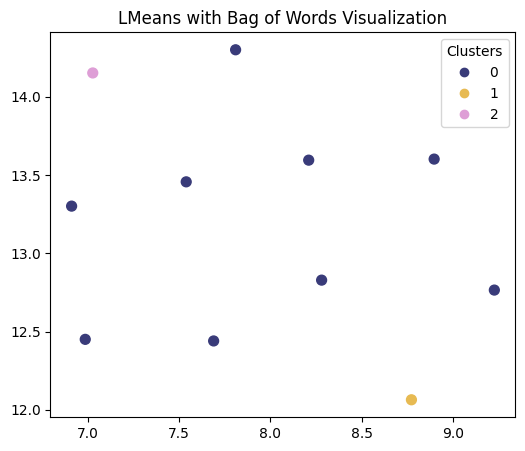

/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


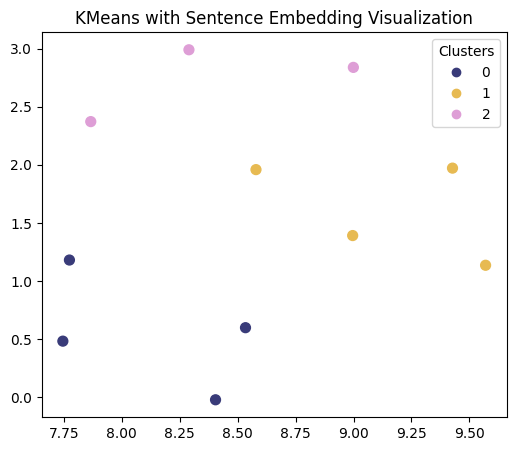

/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


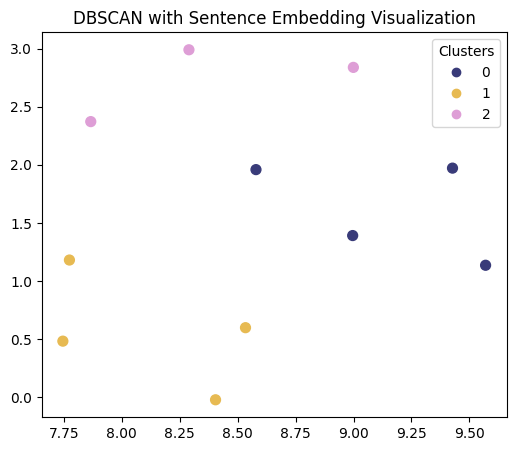

/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


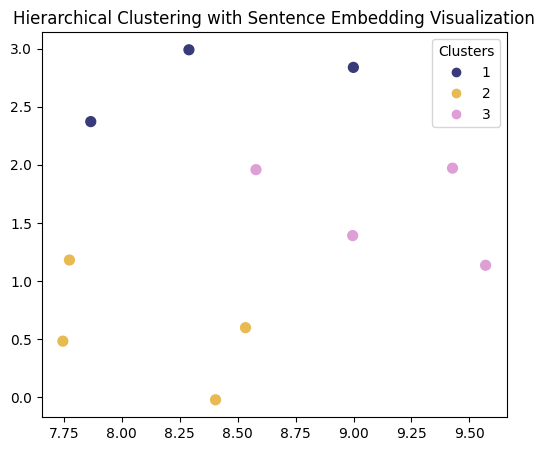

In [26]:
cluster_labels_list = [("KMeans with Sentence Embedding", kmeans_emb_labels), ("DBSCAN with Sentence Embedding", dbscan_emb_labels), ("Hierarchical Clustering with Sentence Embedding", hier_emb_labels)]

plot_umap_clusters(data=transformed_text, cluster_labels=kmeans_bow_labels, title="LMeans with Bag of Words Visualization")

for title, label in cluster_labels_list:

    plot_umap_clusters(data=emb_sents, cluster_labels=label, title=f"{title} Visualization")


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this assignment, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [27]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [28]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [29]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [30]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

</div>

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [31]:
shortest_recipe = min(recipes_df["name"], key=lambda x: len(x))
longest_recipe = max(recipes_df["name"], key=lambda x: len(x))

print("Shortest recipe length:", shortest_recipe)
print("Longest recipe length:", longest_recipe)

Shortest recipe length: bread
Longest recipe length: baked tomatoes with a parmesan cheese crust and balsamic drizzle


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

</div>

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

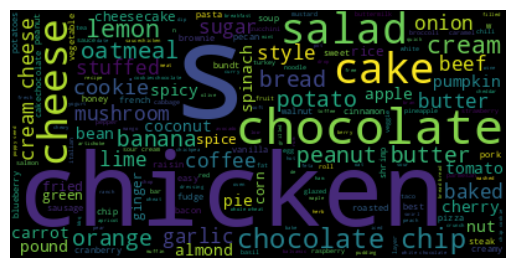

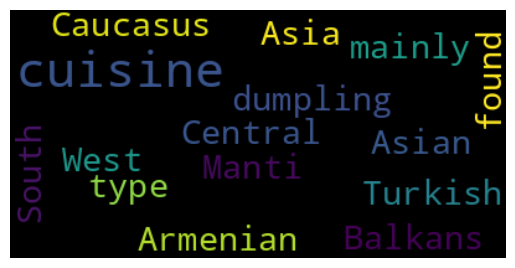

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(recipes_df["name"].str.cat())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**

</div>

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [33]:
embeddings = embedder.encode(recipes_df["name"].tolist())

embeddings

array([[ 0.01959216, -0.08833577,  0.07267742, ...,  0.05684304,
         0.0561515 , -0.12250558],
       [-0.00056662, -0.01182478,  0.07319908, ...,  0.03550129,
         0.07606101, -0.07811907],
       [-0.02260351,  0.06503376, -0.03306535, ..., -0.07578084,
        -0.08347661, -0.12324028],
       ...,
       [-0.08080099,  0.00429511, -0.04432462, ..., -0.01695042,
         0.0120601 ,  0.03977637],
       [-0.06080136,  0.11167203, -0.10875526, ...,  0.02011258,
         0.00497725, -0.00582757],
       [-0.08505889,  0.00906514, -0.08844221, ...,  0.01695606,
         0.01980579, -0.04282043]], shape=(9100, 384), dtype=float32)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [34]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state, replace=replace)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice.

</div>

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

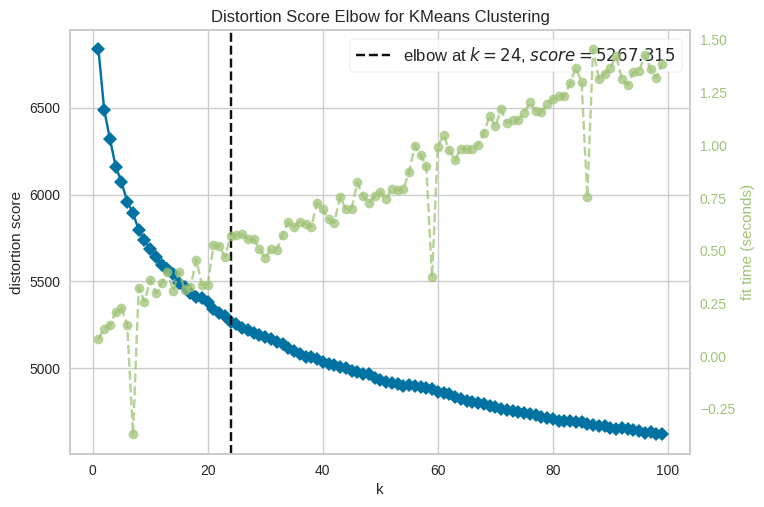

In [35]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=123)
visualizer = KElbowVisualizer(model, k=(1, 100))

visualizer.fit(embeddings)  # Fit the data to the visualizer
visualizer.finalize()

Looking at the graph above, we can see that the distortion score drops at a decreasing rate when we increase the value of k. In addition to the distortion score dropping, the time it takes to fit is also increasing at a linear rate when we increase k. Since the decrease of the distortion score significantly decreases at k=24, we will be using n_clustors to be 24

/home/ram-mashruwala/Coding/Courses/CPSC_330_Assignments/330_hw6/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


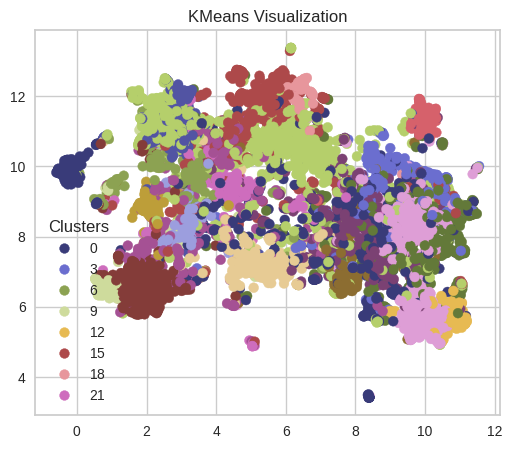

In [36]:
model = KMeans(n_init="auto", random_state=123, n_clusters=24)
kmeans_recipes_labels = model.fit_predict(embeddings)
plot_umap_clusters(data=embeddings, cluster_labels=kmeans_recipes_labels, title="KMeans Visualization")

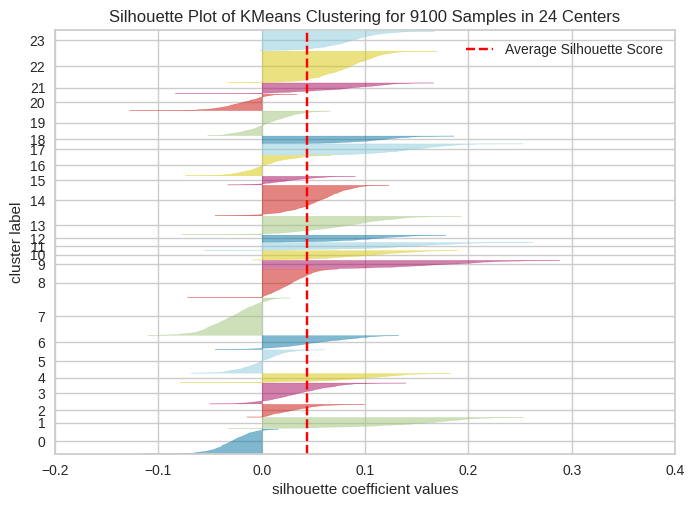

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 24 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(pd.DataFrame(embeddings, index=recipes_df.index))
visualizer.show()

I choose this current model because it is the value right after the drastic drop in the distortion score. Another reason I choose this model is because when I looked at some of the values of the cluster, I saw that it was coherent. For example, in cluster 23 most of the values were salads. Looking at the silhouette score, we can see that for most clusters, it performs well.

In [58]:
print_clusters(recipes_df=recipes_df, cluster_labels=kmeans_recipes_labels)

Cluster 0
----------
biscuit mix tempura vegetables
cabinkat s sweet kolach nut roll
val s low fat veggie dip
pear  leek and gruyre turnovers
yummy mushroom parmesan
mini apple dumplings
asparagus with gruyre
roman roasted vegetables
carmelitas
cabbage patch stew gets a black eye



Cluster 1
----------
low fat chocolate cheesecake muffins
strawberry greek yogurt balsamic muffins
dark mocha muffins
cream cheese coffee cake muffins
double or triple coconut muffins
healthier blueberry oat bran coffeecake muffins
brown sugar oatmeal muffins
asiago cheese muffins
yankee maple corn muffins
my orange marmalade muffins



Cluster 2
----------
low carb blueberry coffee cake
lemon dream cake
orange swirl cake
gingerbread men from a cake mix
moist  tender spice cake  gingerbread variation
butter pecan crisps from cake mix
spicy  amazing gingerbread cake
pumpkin roulade with ginger buttercream  pumpkin cake roll
double the streusel coffee cake
won t kill the diet chocolate cinnamon zucchini cake


I choose this current model because it is the value right after the drastic drop in the distortion score. Another reason I choose this model is because when I looked at some of the values of the cluster, I saw that it was coherent. For example, in cluster 23 most of the values were salads. Looking at the silhouette score, we can see that for most clusters, it performs well.

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`.

</div>

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [72]:
eps_values = [0.10 + 0.05 * i for i in range(1, 20)]

scores = []

for eps in eps_values:
    dbscan = DBSCAN(metric="cosine", min_samples=min_sample, eps=eps)

    dbscan_recipe_lables = dbscan.fit_predict(embeddings)
    print(len(set(dbscan_recipe_lables)), eps)


5 0.15000000000000002
18 0.2
21 0.25
14 0.30000000000000004
6 0.35
2 0.4
2 0.45000000000000007
2 0.5
2 0.55
2 0.6
2 0.65
1 0.7000000000000001
1 0.75
1 0.8
1 0.85
1 0.9
1 0.9500000000000001
1 1.0
1 1.05


Looking at the results, the eps value that gives the most amount of clusters is an eps value of 0.25.

In [73]:
dbscan = DBSCAN(metric="cosine", min_samples=10, eps=0.25)
dbscan_recipe_lables = dbscan.fit_predict(embeddings)
print_clusters(recipes_df=recipes_df, cluster_labels=dbscan_recipe_lables, replace=True)

Cluster -1
----------
chocolate spumone      spumone al cioccolato
lemon cream pie cafe
licorice stick  shot
a more healthy vegetable medley
curried spinach and lentil bake
cuban press
cold tomato   cheese salad
pepperoni studded lasagna
sonic drive inn frito s chili cheese wrap
sarasota s minnesota turkey  mushroom and wild rice soup



Cluster 0
----------
five spice chicken and orange salad
tropical chicken salad
spinach pear salad w bacon and honey dijon dressing
chicken noodle salad
light but luscious blue cheese dressing
chicken with apricot ginger sauce
creamy chicken and cheddar rice
spicy black bean spinach salad
feta and red onion spinach salad
honey mustard dressing



Cluster 1
----------
chocolate chip banana nut muffins
peanut butter and chocolate chunk cookies
pumpkin hand pies
whole wheat carrot cake with creamy orange icing  low fat
peanut butter cookies with milk chocolate chips
lakeland lemon cake
chewy make ahead chocolate chip cookies
coconut dream cake
peppermint 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

</div>

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

Text(0, 0.5, 'Cluster distance')

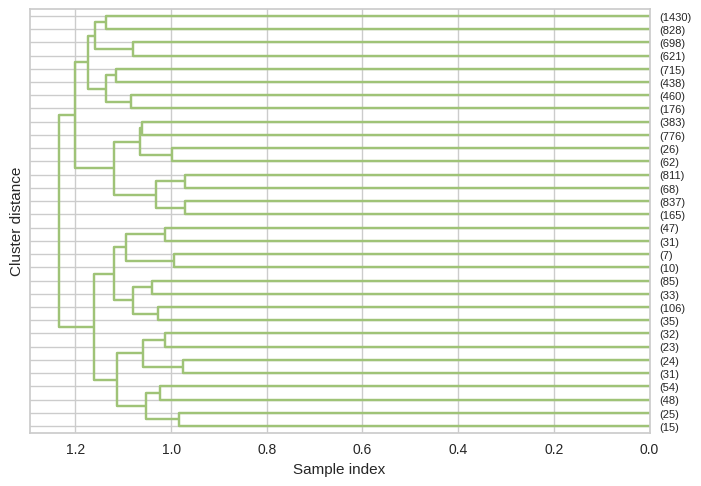

In [45]:
average_linkage_array = linkage(embeddings, metric="cosine", method="complete")
ax = plt.gca()
dendrogram(average_linkage_array, ax=ax, color_threshold=2, p=4, orientation="left", truncate_mode="level")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Looking at the tree, it seems like the best amount of clusters is 27 clusters (right on 1.0 sample index)

In [74]:
hier_recipe_labels = fcluster(average_linkage_array, 27, criterion="maxclust")

In [76]:
print_clusters(recipes_df=recipes_df, cluster_labels=hier_recipe_labels)

Cluster 1
----------
ginger limeade
lime water
creamy kiss
texas roadhouse cowboy quencher
pacific blue
voodoo
amaretto shake
matcha green sparkler
strawberry crush cooler
amaretto strawberry trifle



Cluster 2
----------
cranberry cosmopolitan
cold shoulder
el ritual
genoese
caribe cosmopolitan
hana passion
cosmopolitan champagne
tequilibrium
flaming angry dragon
french cosmopolitan



Cluster 3
----------
sand in your shorts
allie s simple vinaigrette
burberry bulldog
nutty rocky road bars
sand drops
rigatoni campagnolo like carrabba s
horny bull
rocky road mocha
pumpkin hermits
chubby bunnies



Cluster 4
----------
blue caribbean sunset
procession of the pink elephants
blue lady
pink cadillac
mujadara
paradise
melissa s fried taunga
an elbow in the boobs
malibu zinger
nitro



Cluster 5
----------
apple crumble tarts
uncle bill s kiev beef stroganoff
barefoot contessa s tequila lime chicken
traditional tamales
pistachio torte
tamale round about
hidden berry cream cheese torte
loll

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods?

</div>

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

Here are the labels I'd give to each of the clusters generated by different clustering methods:

1) KMeans:

| Cluster Number | Label I'd Give |
| -------------- | -------------- |
| 0 | Vegetable Appetizers |
| 1 | Muffins |
| 2 | Cakes |
| 3 | Roasted Meats |
| 4 | Bars |
| 5 | International Dishes |
| 6 | Deserts |
| 7 | Salads |
| 8 | Cakes |
| 9 | Oatmeal Cookies |
| 10 | Potato Based Dishes |
| 11 | Brownies |
| 12 | Salad Dressings |
| 13 | Breads |
| 14 | Cookies |
| 15 | Cocktails |
| 16 | Non-Alcoholic Beverages |
| 17 | Soups |
| 18 | Martinis |
| 19 | Fine Dining Dishes |
| 20 | Deserts | 
| 21 | Pies | 
| 22 | Chicken dishes | 
| 23 | Cold Dishes | 

2) DBSCAN

| Cluster Number | Label I'd Give |
| -------------- | -------------- |
| −1 | Misc |
| 0|Chicken Salads & Dressings|
| 1|Cookies, Muffins & Small Desserts|
| 2|Classic Meatloaf Recipes|
| 3|Hearty Soups (Chicken, Lentil, Split Pea)|
| 4|Meatballs (Beef & Chicken Variations)|
| 5|Biscuits & Quick Breads|
| 6|Fruit Smoothies|
| 7|Cabbage & Potato Soups|
| 8|Margaritas & Martini Cocktails|
| 9|Stuffed Chicken Breast Dishes|
| 10|Chicken with Cream or Tomato Sauces|
| 11|Cornbread Variations|
| 12|Chicken Enchiladas & Tex-Mex Casseroles|
| 13|French Toast & Breakfast Bakes|
| 14|Garlic & Herb Breads|
| 15|Potato Salads|
| 16|Oatmeal & Whole-Grain Breads|
| 17|Pecan Pies & Nut Pies|
| 18|Stuffed Bell Pepper Dishes|
| 19|Vanilla & Specialty Cupcakes|
| 20|Corn Muffins & Maple Muffins|


3) Hierarchy

| Cluster Number | Label I'd Give |
| -------------- | -------------- |
| 1|Refreshing Drinks|
| 2|Fruity Cocktails|
| 3|Mixed Recipes|
| 4|Tropical Dishes|
| 5|Savory Tortes|
| 6|Creamy Floats|
| 7|Italian Classics|
| 8|Sweet Treats|
| 9|Coffee & Spice|
| 10|Dessert Bars|
| 11|Nutty Desserts|
| 12|Brownie Bliss|
| 13|Comfort Foods|
| 14|Light Bites|
| 15|Cookie Delights|
| 16|Hearty Mains|
| 17|Seafood Specials|
| 18|Creative Cocktails|
| 19|Fruity Desserts|
| 20|Fresh Salads|
| 21|Healthy Bowls|
| 22|Chicken Bakes|
| 23|Cozy Stews|
| 24|Autumn Flavors|
| 25|Savory Pizzas|
| 26|Family Casseroles|
| 27|Citrus Sweets|

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Here is a quick checklist before submitting: 

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large and doesn't render on Gradescope, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html).  

![](img/eva-well-done.png)